In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px 
import requests
# import selenium

from bs4 import BeautifulSoup

In [2]:
url_kauno = 'https://kauno.diena.lt/'

page_kauno = requests.get(url_kauno)

source_kauno = page_kauno.content

bs_kauno = BeautifulSoup(source_kauno, 'html.parser')
# print(bs)
nuorodos_kauno = []
pavadinimai_kauno = []
straipsniai_kauno = bs_kauno.find_all('div', {'category-block-row grid-12 alpha omega unscore'})
for s in straipsniai_kauno:
    i = s.find('div', {'class':'articles-list-title-wrapper'})
    if i is not None:
        t = i.find('a', {'class':'articles-list-title'})
        pavadinimai_kauno.append(t.text)
        nuorodos_kauno.append(t['href'])
        # print(':::REM:::')
        # print(t)
        # print('HREF?')
        # print(t['href'])
        # print(t.text)

print(len(pavadinimai_kauno))
print(pavadinimai_kauno)
print(len(nuorodos_kauno))
print(nuorodos_kauno)

29
['Seimo rinkimai: įvardijo, kada galima tikėtis rezultatų', 'Aiškėja daugiau detalių apie šaulį: galėjo turėti ryšių su „Vilniaus brigada“', 'Dar vienas kalėjimo bėglys: ieškomas į Pravieniškes negrįžęs nuteistasis', 'Nuotraukos sujungė tris šalis', 'Repeticija, trunkanti pusę gyvenimo', 'Veiksmas Partizanų gatvėje: pareigūnai šturmavo automobilį, sulaikytas vyras', 'Darbdavio magija: kas darbuotoją skatina įsitraukti ir augti?', 'Akibrokštas privačiai greitajai pagalbai: 50 įdarbintų žmonių valstybei neįdomu?', 'Vyriausybė nepritaria, kad baigę gyvulininkystę teiktų sveikatos paslaugas su gyvūnais', 'Šeima – tarsi universitetas, kuriame mokomės iš artimųjų', 'Sociologė įvertino Seimo rinkimų aktyvumą: stebuklų nebus', 'Keičiama tvarka: policija nebelydės uosto krovinių', 'Iš išaugtų vaikiškų drabužių – prisiminimų šiltukai', 'Mainų platformos įkūrėja: gyventi tvariau – naudinga ir finansiškai', 'Vilniaus valdžia siūlo skverui suteikti Mažosios Lietuvos vardą, aikštei – J. K. Glaubi

In [4]:
# Suraskite vidutinį straipsnių pavadinimuose esančių žodžių skaičių.
zodziu_kiekiai_kauno = []
for pav in pavadinimai_kauno:
    kiekis =len(pav.split())
    zodziu_kiekiai_kauno.append(kiekis)
    
vidutinis_zodziu_kiekis_kauno = sum(zodziu_kiekiai_kauno) / len(zodziu_kiekiai_kauno)
print(f'vidutinis zodziu kiekis "Kauno diena" pavadinimuose: {vidutinis_zodziu_kiekis_kauno}')

vidutinis zodziu kiekis "Kauno diena" pavadinimuose: 8.172413793103448


{4: 2, 5: 2, 6: 4, 7: 3, 8: 7, 9: 4, 10: 2, 11: 1, 12: 1, 13: 3}
29


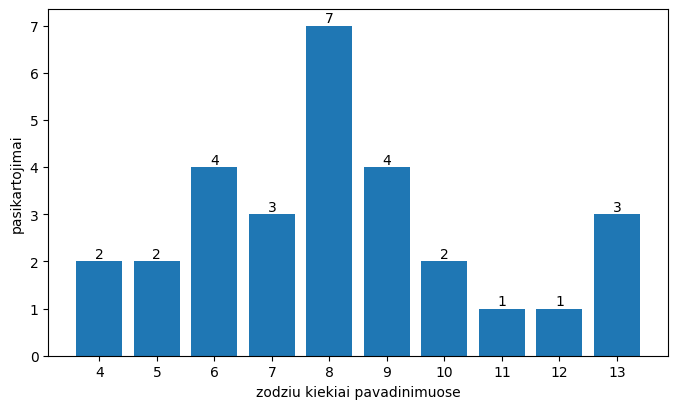

In [5]:
kiekiai_dict_kauno = {}
for k in (list(set(zodziu_kiekiai_kauno))):
    kiekiai_dict_kauno[k] = 0


for k in kiekiai_dict_kauno.keys():
    c = zodziu_kiekiai_kauno.count(k)
    kiekiai_dict_kauno[k] = c
    
print(kiekiai_dict_kauno)
print(sum(kiekiai_dict_kauno.values()))

x_asis = list(kiekiai_dict_kauno.keys())

fig, ax = plt.subplots(figsize=(8, 4.5))

B = ax.bar(kiekiai_dict_kauno.keys(), kiekiai_dict_kauno.values())
ax.bar_label(B)
ax.set_xticks(x_asis)
ax.set_xlabel('zodziu kiekiai pavadinimuose')
ax.set_ylabel('pasikartojimai')

plt.show()

In [6]:
idx_kauno = (zodziu_kiekiai_kauno.index(max(zodziu_kiekiai_kauno)))
print(idx_kauno)
print(pavadinimai_kauno[idx_kauno])
print(nuorodos_kauno[idx_kauno])
max_zodziu_straipsnis_kauno = nuorodos_kauno[idx_kauno]

14
Vilniaus valdžia siūlo skverui suteikti Mažosios Lietuvos vardą, aikštei – J. K. Glaubico
https://www.diena.lt/naujienos/vilnius/miesto-pulsas/vilniaus-valdzia-siulo-skverui-suteikti-mazosios-lietuvos-varda-aikstei-j-k-glaubico-1195613


In [7]:
if max_zodziu_straipsnis_kauno.startswith('https:'):
    url2_kauno = max_zodziu_straipsnis_kauno
else:
    url2_kauno = f'https://kauno.diena.lt/{max_zodziu_straipsnis_kauno}'
    
print(url2_kauno)

page_kauno = requests.get(url2_kauno)

source_kauno = page_kauno.content

bs2_kauno = BeautifulSoup(source_kauno, 'html.parser')
# print(bs)
# tekstas = ''

pastraipos_kauno = bs2_kauno.find_all('span', {'itemprop':'articleBody'})
# print(len(pastraipos))
tekstas_kauno = pastraipos_kauno[0].text

    
print(len(tekstas_kauno.split()))

from collections import Counter

zodziai_tektste_kauno = dict(Counter(tekstas_kauno.split()))
print(zodziai_tektste_kauno.values())

https://www.diena.lt/naujienos/vilnius/miesto-pulsas/vilniaus-valdzia-siulo-skverui-suteikti-mazosios-lietuvos-varda-aikstei-j-k-glaubico-1195613


IndexError: list index out of range

In [ ]:
df_kauno = pd.DataFrame(zodziai_tektste_kauno.items(), columns=['zodis', 'kiekis'])



In [ ]:
df_st_kauno = df_kauno.sort_values(by=['kiekis'],ascending=False).reset_index()[:5]


In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=df_st_kauno, x=df_st_kauno['zodis'], y=df_st_kauno['kiekis'])
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
zodziai_straipsniuose_kauno = []

for nuoroda in nuorodos_kauno:
    # print(nuoroda)
    if  nuoroda.startswith('https'):
        url3_kauno = nuoroda
    else:
        url3_kauno = f'https://kauno.diena.lt/{nuoroda}'

        page_kauno = requests.get(url3_kauno)
        source_kauno = page_kauno.content

        bs3_kauno = BeautifulSoup(source_kauno, 'html.parser')
        pastraipos_kauno = bs3_kauno.find_all('span', {'itemprop':'articleBody'})

        tekstas_kauno = pastraipos_kauno[0].text

        zodziai_straipsniuose_kauno.append(len(tekstas_kauno.split()))
        # time.sleep(0.5)
        # print(len(tekstas.split()))

print(len(zodziai_straipsniuose_kauno))
print(zodziai_straipsniuose_kauno)

print(f'vidutinis zodziu kiekis straipsniuose: {sum(zodziai_straipsniuose_kauno) / len(zodziai_straipsniuose_kauno)}')

